# Microsoft Movie Analysis

## Overview

This project analyzes the various aspects of movie performance from [IMDB](https://www.imdb.com/) and [Box Office Mojo](https://www.boxofficemojo.com/). While the film industry often relies on income from the box office, many movie theaters are closed due to the current pandemic. Therefore, these conditions may stress the importance of consumer ratings in movie performance.

## Business Problem

Like its fellow competitors, Microsoft would like to begin creating original movies. They have opened up a new movie studio, but the company needs insight into what kind of movies are generally the best performing. "Success" in this analysis is determined by domestic gross income, movie rating, and popularity (i.e., number of votes) across each genre.

## Questions:

1) Which genres generate the highest domestic gross?

2) Which genres have the highest ratings?

3) Which genres are the most popular?

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
pd.options.display.max_rows=200
%matplotlib inline

In [6]:
cd zippedData/

/Users/jerpagirsky/Desktop/Flatiron/CourseMaterials/Phase_1/dsc-phase-1-project-online/zippedData


### Box Office Mojo (BOM) Data

In [7]:
df1 = pd.read_csv('bom.movie_gross.csv.gz', compression='gzip')
df1.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


### IMDB Data

In [8]:
df2 = pd.read_csv('imdb.title.basics.csv')
df2.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [9]:
df2

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [10]:
genres_col = df2['genres'].dropna()

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [12]:
df3 = pd.read_csv('imdb.title.ratings.csv.gz')
df3.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [13]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
tconst           73856 non-null object
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


### Merging Datasets

I am merging the two IMDB datasets on `tconst`, a unique identifier for each movie.

In [14]:
df2 = df2.set_index('tconst')
df3 = df3.set_index('tconst')

In [15]:
imdb_df = pd.concat([df2, df3], axis=1, sort=True)

In [16]:
imdb_df.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


I want to join the Box Office Mojo dataset (`df1`) to the joined IMDB dataset (`imdb_df`). I need to examine and standardize the columns before joining. I will rename the `primary_title` and `start_year` columns and set them both as the indices for the IMDB dataset.

In [17]:
df1.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [18]:
imdb_df.rename(columns = {'primary_title': 'title', 'start_year': 'year'}, inplace = True)

In [19]:
imdb_df.set_index(['title', 'year'], inplace=True)

In [20]:
imdb_df

,,original_title,runtime_minutes,genres,averagerating,numvotes
title,year,,,,,
Sunghursh,2013,Sunghursh,175.0,"Action,Crime,Drama",7.0,77.0
One Day Before the Rainy Season,2019,Ashad Ka Ek Din,114.0,"Biography,Drama",7.2,43.0
The Other Side of the Wind,2018,The Other Side of the Wind,122.0,Drama,6.9,4517.0
Sabse Bada Sukh,2018,Sabse Bada Sukh,NaN,"Comedy,Drama",6.1,13.0
The Wandering Soap Opera,2017,La Telenovela Errante,80.0,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...
Kuambil Lagi Hatiku,2019,Kuambil Lagi Hatiku,123.0,Drama,NaN,NaN
Rodolpho Teóphilo - O Legado de um Pioneiro,2015,Rodolpho Teóphilo - O Legado de um Pioneiro,NaN,Documentary,NaN,NaN
Dankyavar Danka,2013,Dankyavar Danka,NaN,Comedy,NaN,NaN


I will also set `title` and `year` as the indices for the Box Office Mojo dataset so they can join to the IMDB dataset.

In [21]:
df1.set_index(['title', 'year'], inplace=True)

In [22]:
df1

,,studio,domestic_gross,foreign_gross
title,year,,,
Toy Story 3,2010,BV,415000000.0,652000000
Alice in Wonderland (2010),2010,BV,334200000.0,691300000
Harry Potter and the Deathly Hallows Part 1,2010,WB,296000000.0,664300000
Inception,2010,WB,292600000.0,535700000
Shrek Forever After,2010,P/DW,238700000.0,513900000
...,...,...,...,...
The Quake,2018,Magn.,6200.0,NaN
Edward II (2018 re-release),2018,FM,4800.0,NaN
El Pacto,2018,Sony,2500.0,NaN


#### I use an `outer` join to include all data from both datasets. I have named my new working dataset `joined_df`.

In [23]:
joined_df = imdb_df.join(df1, how='outer')

### Data Cleaning

The majority of the analyses pertain to movie genre. As shown below, because over 96% of genre data is *not* null, I will drop all null values from the `genres` column.

In [24]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 147698 entries, (!Women Art Revolution, 2010) to (Šiška Deluxe, 2015)
Data columns (total 8 columns):
original_title     146123 non-null object
runtime_minutes    114405 non-null float64
genres             140736 non-null object
averagerating      73856 non-null float64
numvotes           73856 non-null float64
studio             3422 non-null object
domestic_gross     3399 non-null float64
foreign_gross      2061 non-null object
dtypes: float64(4), object(4)
memory usage: 10.8+ MB


In [25]:
140736/146123

0.9631337982384703

In [26]:
joined_df = joined_df[joined_df['genres'].notna()]

In [27]:
joined_df.head()

original_title  runtime_minutes  \
title                 year                                          
!Women Art Revolution 2010  Women Art Revolution             83.0   
#1 Serial Killer      2013      #1 Serial Killer             87.0   
#5                    2013                    #5             68.0   
                      2018                    #5              NaN   
#50Fathers            2015            #50Fathers            132.0   

                                              genres  averagerating  numvotes  \
title                 year                                                      
!Women Art Revolution 2010               Documentary            6.9     196.0   
#1 Serial Killer      2013                    Horror            5.6      40.0   
#5                    2013  Biography,Comedy,Fantasy            6.8       6.0   
                      2018               Documentary            NaN       NaN   
#50Fathers            2015                    Comedy            NaN       NaN   

                           studio  domestic_gross foreign_gross  
title                 year                                       
!Women Art Revolution 2010    NaN             NaN           NaN  
#1 Serial Killer      2013    NaN             NaN           NaN  
#5                    2013    NaN             NaN           NaN  
                      2018    NaN             NaN           NaN  
#50Fathers            2015    NaN             NaN           NaN

I will drop `studio` and `foreign_gross`, since they are not relevant to my analyis.

In [28]:
runtime_df = joined_df[(joined_df['runtime_minutes'] >=15)&
(joined_df['runtime_minutes']<=210)].sort_values(by='runtime_minutes',ascending=True)

In [29]:
runtime_df

,,original_title,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross
title,year,,,,,,,,
Lessons on Leaving Your Body,2014,Lessons on Leaving Your Body,15.0,Documentary,NaN,NaN,NaN,NaN,NaN
My Life's a Joke,2011,My Life's a Joke,15.0,"Comedy,Documentary,Horror",NaN,NaN,NaN,NaN,NaN
Dance Like A Butterfly Dream Boy: Sweden,2014,Dance Like A Butterfly Dream Boy: Sweden,15.0,Documentary,NaN,NaN,NaN,NaN,NaN
Parallel Lives,2011,Parallel Lives,15.0,"Biography,Documentary",NaN,NaN,NaN,NaN,NaN
Art of Tease,2012,Art of Tease,15.0,"Comedy,Documentary,Drama",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
The Next Generation Movie,2015,The Next Generation Movie,210.0,Comedy,NaN,NaN,NaN,NaN,NaN
Make that move,2018,Make that move,210.0,Music,NaN,NaN,NaN,NaN,NaN
The Night of the Ad Eaters 2013,2013,The Night of the Ad Eaters 2013,210.0,History,NaN,NaN,NaN,NaN,NaN


In [31]:
104096/114405

0.9098903019972904

In [32]:
joined_df.drop(columns = ['studio', 'foreign_gross'], inplace=True)

I am creating a list of a set of genres to iterate over in a function that will return data from other columns respective to each genre. 

In [33]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 140736 entries, (!Women Art Revolution, 2010) to (Šiška Deluxe, 2015)
Data columns (total 6 columns):
original_title     140734 non-null object
runtime_minutes    112233 non-null float64
genres             140736 non-null object
averagerating      73052 non-null float64
numvotes           73052 non-null float64
domestic_gross     1861 non-null float64
dtypes: float64(4), object(2)
memory usage: 8.2+ MB


In [34]:
new_genres_col = joined_df['genres'].dropna()

In [35]:
new_genres_col = new_genres_col.str.split(',')

In [36]:
list_of_genres = []
for row in new_genres_col:
    for x in row:
        list_of_genres.append(x)

In [37]:
list_of_genres = list(set(list_of_genres))

In [38]:
genres_df = pd.DataFrame(new_genres_col)

In [39]:
genres_df

genres
title                              year                              
!Women Art Revolution              2010                 [Documentary]
#1 Serial Killer                   2013                      [Horror]
#5                                 2013  [Biography, Comedy, Fantasy]
                                   2018                 [Documentary]
#50Fathers                         2015                      [Comedy]
...                                                               ...
è solo questione di punti di vista 2012   [Action, Adventure, Comedy]
è solo questione di tempo          2013                      [Comedy]
élèctions piege à cons             2014                      [Comedy]
împetu                             2017                 [Documentary]
Šiška Deluxe                       2015               [Comedy, Drama]

[140736 rows x 1 columns]

In [40]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 140736 entries, (!Women Art Revolution, 2010) to (Šiška Deluxe, 2015)
Data columns (total 6 columns):
original_title     140734 non-null object
runtime_minutes    112233 non-null float64
genres             140736 non-null object
averagerating      73052 non-null float64
numvotes           73052 non-null float64
domestic_gross     1861 non-null float64
dtypes: float64(4), object(2)
memory usage: 8.2+ MB


Because `domestic_gross` contains a significant amount of null values, I will create a new dataframe called `dom_gross_df` that examines the relationship between domestic gross and genre.

In [41]:
dom_gross_df = joined_df[joined_df['domestic_gross'].notna()]

In [42]:
dom_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1861 entries, (10 Cloverfield Lane, 2016) to (Zootopia, 2016)
Data columns (total 6 columns):
original_title     1861 non-null object
runtime_minutes    1852 non-null float64
genres             1861 non-null object
averagerating      1835 non-null float64
numvotes           1835 non-null float64
domestic_gross     1861 non-null float64
dtypes: float64(4), object(2)
memory usage: 1.1+ MB


I'll remove the nulls from `runtime_minutes` and from `averagerating`, which should correspond with the nulls from `numvotes`.

In [43]:
dom_gross_df = dom_gross_df[dom_gross_df['averagerating'].notna()]

In [44]:
dom_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1835 entries, (10 Cloverfield Lane, 2016) to (Zootopia, 2016)
Data columns (total 6 columns):
original_title     1835 non-null object
runtime_minutes    1832 non-null float64
genres             1835 non-null object
averagerating      1835 non-null float64
numvotes           1835 non-null float64
domestic_gross     1835 non-null float64
dtypes: float64(4), object(2)
memory usage: 1.1+ MB


In [45]:
dom_gross_df = dom_gross_df[dom_gross_df['runtime_minutes'].notna()]

In [46]:
dom_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1832 entries, (10 Cloverfield Lane, 2016) to (Zootopia, 2016)
Data columns (total 6 columns):
original_title     1832 non-null object
runtime_minutes    1832 non-null float64
genres             1832 non-null object
averagerating      1832 non-null float64
numvotes           1832 non-null float64
domestic_gross     1832 non-null float64
dtypes: float64(4), object(2)
memory usage: 1.1+ MB


Examine the duplicated titles in the `joined_df` before I decide if I want to duplicate it (which turns out to be yes)

In [61]:
joined_df.loc[joined_df['original_title'].duplicated()]

original_title  \
title                                  year                                           
#5                                     2018                                      #5   
(aguirre)                              2016                               (aguirre)   
1                                      2016                                       1   
                                       2019                                       1   
10                                     2012                                      10   
...                                                                             ...   
Ângelo de Sousa - Tudo o Que Sou Capaz 2010  Ângelo de Sousa - Tudo o Que Sou Capaz   
                                       2010  Ângelo de Sousa - Tudo o Que Sou Capaz   
                                       2010  Ângelo de Sousa - Tudo o Que Sou Capaz   
Éden                                   2013                                    Éden   
Ódio                                   2017                                    Ódio   

                                             runtime_minutes  \
title                                  year                    
#5                                     2018              NaN   
(aguirre)                              2016             98.0   
1                                      2016             22.0   
                                       2019            100.0   
10                                     2012             76.0   
...                                                      ...   
Ângelo de Sousa - Tudo o Que Sou Capaz 2010             60.0   
                                       2010             60.0   
                                       2010             60.0   
Éden                                   2013             73.0   
Ódio                                   2017              NaN   

                                                                   genres  \
title                                  year                                 
#5                                     2018                   Documentary   
(aguirre)                              2016  Biography,Comedy,Documentary   
1                                      2016                   Documentary   
                                       2019                         Drama   
10                                     2012                      Thriller   
...                                                                   ...   
Ângelo de Sousa - Tudo o Que Sou Capaz 2010         Biography,Documentary   
                                       2010         Biography,Documentary   
                                       2010         Biography,Documentary   
Éden                                   2013                         Drama   
Ódio                                   2017                        Action   

                                                 genre_1      genre_2  \
title                                  year                             
#5                                     2018  Documentary         None   
(aguirre)                              2016    Biography       Comedy   
1                                      2016  Documentary         None   
                                       2019        Drama         None   
10                                     2012     Thriller         None   
...                                                  ...          ...   
Ângelo de Sousa - Tudo o Que Sou Capaz 2010    Biography  Documentary   
                                       2010    Biography  Documentary   
                                       2010    Biography  Documentary   
Éden                                   2013        Drama         None   
Ódio                                   2017       Action         None   

                                                 genre_3  averagerating  \
title                                  year                               
#5

Total amount of duplicates is 7713.

In [52]:
joined_df['original_title'].duplicated().sum()

0

In [48]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 140736 entries, (!Women Art Revolution, 2010) to (Šiška Deluxe, 2015)
Data columns (total 6 columns):
original_title     140734 non-null object
runtime_minutes    112233 non-null float64
genres             140736 non-null object
averagerating      73052 non-null float64
numvotes           73052 non-null float64
domestic_gross     1861 non-null float64
dtypes: float64(4), object(2)
memory usage: 8.2+ MB


See how much data I would be losing:

In [65]:
7713/140734

0.054805519632782414

I'll drop the duplicates, which make up about 5% of the data.

In [49]:
joined_df = joined_df.drop_duplicates(subset=['original_title'])

Double check to see if I have any duplicate titles left.

In [50]:
joined_df.duplicated().sum()

0

### Null Values

Now moving onto null values for each column. Let's jump to with `averagerating`.

In [53]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 133023 entries, (!Women Art Revolution, 2010) to (Šiška Deluxe, 2015)
Data columns (total 6 columns):
original_title     133022 non-null object
runtime_minutes    106282 non-null float64
genres             133023 non-null object
averagerating      69281 non-null float64
numvotes           69281 non-null float64
domestic_gross     1702 non-null float64
dtypes: float64(4), object(2)
memory usage: 7.8+ MB


In [54]:
joined_df['averagerating'].isna().sum()

63742

In [55]:
63742/133023

0.4791802921299324

I want to create new subset dataframes to slice the data pertaining to each variable. I am using the descriptive data to gauge where I will cut out necessary outliers.

In [62]:
joined_df.describe()

,runtime_minutes,averagerating,numvotes,domestic_gross
count,106282.000000,69281.000000,6.928100e+04,1.702000e+03
mean,86.304238,6.338566,3.460881e+03,4.302755e+07
std,172.337955,1.475097,3.023482e+04,7.793753e+07
min,1.000000,1.000000,5.000000e+00,3.000000e+02
25%,70.000000,5.500000,1.400000e+01,5.440000e+05
50%,87.000000,6.500000,5.000000e+01,1.045000e+07
75%,99.000000,7.400000,2.820000e+02,5.232500e+07
max,51420.000000,10.000000,1.841066e+06,7.001000e+08


In [87]:
avg_rate_df = joined_df[(joined_df['numvotes'] >=10)]

In [88]:
avg_rate_df.head()

,,original_title,runtime_minutes,genres,averagerating,numvotes,domestic_gross
title,year,,,,,,
!Women Art Revolution,2010,Women Art Revolution,83.0,Documentary,6.9,196.0,NaN
#1 Serial Killer,2013,#1 Serial Killer,87.0,Horror,5.6,40.0,NaN
#66,2015,#66,116.0,Action,5.3,18.0,NaN
#ALLMYMOVIES,2015,#ALLMYMOVIES,NaN,Documentary,8.3,21.0,NaN
#BKKY,2016,#BKKY,75.0,Drama,7.4,23.0,NaN


In [91]:
list(enumerate(avg_rate_df.index))

[(0, ('!Women Art Revolution', 2010)),
 (1, ('#1 Serial Killer', 2013)),
 (2, ('#66', 2015)),
 (3, ('#ALLMYMOVIES', 2015)),
 (4, ('#BKKY', 2016)),
 (5, ('#BeRobin the Movie', 2015)),
 (6, ('#Beings', 2015)),
 (7, ('#Captured', 2017)),
 (8, ('#DigitalLivesMatter', 2016)),
 (9, ('#Female Pleasure', 2018)),
 (10, ('#FollowFriday', 2016)),
 (11, ('#Followme', 2019)),
 (12, ('#Horror', 2015)),
 (13, ('#Lucky Number', 2015)),
 (14, ('#Malam Jumat: The Movie', 2019)),
 (15, ('#Nerealnaya lyubov', 2014)),
 (16, ('#O2LForever', 2015)),
 (17, ('#OntheShouldersofGiants', 2017)),
 (18, ('#Powerplant', 2019)),
 (19, ('#REALITYHIGH', 2017)),
 (20, ('#Realmovie', 2013)),
 (21, ('#Resistayol', 2016)),
 (22, ('#Roxy', 2018)),
 (23, ('#Rucker50', 2016)),
 (24, ('#Screamers', 2016)),
 (25, ('#Selfieparty', 2016)),
 (26, ('#Sequence', 2013)),
 (27, ('#Slaughterhouse', 2017)),
 (28, ('#Sohavégetnemérös', 2016)),
 (29, ('#SquadGoals', 2018)),
 (30, ('#Starvecrow', 2017)),
 (31, ('#Stuck', 2014)),
 (32, ('#T

In [92]:
avg_rate_df.reset_index()

,title,year,original_title,runtime_minutes,genres,averagerating,numvotes,domestic_gross
0,!Women Art Revolution,2010,Women Art Revolution,83.0,Documentary,6.9,196.0,NaN
1,#1 Serial Killer,2013,#1 Serial Killer,87.0,Horror,5.6,40.0,NaN
2,#66,2015,#66,116.0,Action,5.3,18.0,NaN
3,#ALLMYMOVIES,2015,#ALLMYMOVIES,NaN,Documentary,8.3,21.0,NaN
4,#BKKY,2016,#BKKY,75.0,Drama,7.4,23.0,NaN
...,...,...,...,...,...,...,...,...
58030,Üç Harfliler: Adak,2019,Üç Harfliler: Adak,91.0,"Horror,Thriller",7.2,212.0,NaN
58031,Üç Harflilerin Musallat Oldugu Büyülü Konakta ...,2018,Üç Harflilerin Musallat Oldugu Büyülü Konakta ...,80.0,"Comedy,Horror,Thriller",4.8,51.0,NaN
58032,"Üç, Iki, Bir... Kestik!",2014,"Üç, Iki, Bir... Kestik!",92.0,Comedy,4.3,88.0,NaN
58033,ärtico,2014,ärtico,78.0,Drama,6.6,101.0,NaN


In [80]:
avg_rate_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 58035 entries, (Leatherdaddy, 2019) to (Inception, 2010)
Data columns (total 6 columns):
original_title     58035 non-null object
runtime_minutes    53274 non-null float64
genres             58035 non-null object
averagerating      58035 non-null float64
numvotes           58035 non-null float64
domestic_gross     1702 non-null float64
dtypes: float64(4), object(2)
memory usage: 4.0+ MB


In [83]:
avg_rate_df = avg_rate_df.dropna(subset=['genres'])

In [84]:
'Sci-Fi' in avg_rate_df['genres'][2]

False

In [94]:
def avg_genre_rating(genre):
    """
    Finds the average rating for a genre.
    Input: Genre as a string.
    Output: Average rating for genre as a float.
    """
    genre_rating = []
    for x in avg_rate_df.index:
        if genre in avg_rate_df['genres'][x]:
            genre_rating.append(avg_rate_df['averagerating'][x])
    return(np.mean(genre_rating)).round(2)

In [97]:
avg_genre_rating('Action')

5.75

In [98]:
genre_rating = []
for genre in list_of_genres:
    genre_rating.append(avg_genre_rating(genre))

/Users/jerpagirsky/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning:

Mean of empty slice.

/Users/jerpagirsky/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning:

invalid value encountered in double_scalars



In [100]:
genre_rating = []
for genre in list_of_genres:
    print(genre, avg_genre_rating(genre))

Family 6.29


/Users/jerpagirsky/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning:

Mean of empty slice.

/Users/jerpagirsky/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning:

invalid value encountered in double_scalars



Short nan
Crime 6.06
Romance 6.1
Comedy 5.92
Game-Show nan
Musical 6.46
War 6.49
Horror 4.93
Western 5.7
Reality-TV 6.27
Sport 6.89
Animation 6.24
Adventure 6.1
Documentary 7.3
Adult 2.7
Mystery 5.84
Thriller 5.57
Action 5.75
Sci-Fi 5.41
Fantasy 5.84
Music 6.88
Biography 7.11
Talk-Show nan
History 6.98
News 7.26
Drama 6.35


In [96]:
joined_df.loc[joined_df['genres'] == 'Talk-Show']

,,original_title,runtime_minutes,genres,averagerating,numvotes,domestic_gross
title,year,,,,,,
A SETI Talk with Nathalie Cabrol,2010,A SETI Talk with Nathalie Cabrol,71.0,Talk-Show,NaN,NaN,NaN
D23: Mickey Mouse Club Celebration,2015,D23: Mickey Mouse Club Celebration,90.0,Talk-Show,NaN,NaN,NaN
Dudes and a Dog: 2013 New Year's Eve Extravaganza Podcast,2013,Dudes and a Dog: 2013 New Year's Eve Extravaga...,NaN,Talk-Show,NaN,NaN,NaN
Enter the Grandmaster the Memoir of Stephen Chang,2014,Enter the Grandmaster the Memoir of Stephen Chang,NaN,Talk-Show,NaN,NaN,NaN
Friday I'm in Love,2015,Friday I'm in Love,NaN,Talk-Show,NaN,NaN,NaN
Great Canadians,2016,Great Canadians,NaN,Talk-Show,NaN,NaN,NaN
Gregor Barnsdale's Hard Truths,2019,Gregor Barnsdale's Hard Truths,75.0,Talk-Show,NaN,NaN,NaN
Hollywood Health Report,2015,Hollywood Health Report,NaN,Talk-Show,NaN,NaN,NaN
Implantes Alienígenas: Palestra com Marco Antônio Petit,2018,Implantes Alienígenas: Palestra com Marco Antô...,101.0,Talk-Show,NaN,NaN,NaN


In [103]:
len(joined_df[joined_df['genres'] == 'Talk-Show'])

39

In [102]:
len(joined_df.loc[joined_df['genres'] == 'Short'])

0

In [104]:
len(joined_df.loc[joined_df['genres'] == 'Game-Show'])

2

In [92]:
list_of_genres.remove('Talk-Show')

In [93]:
list_of_genres.remove('Short')

In [105]:
list_of_genres.remove('Short')

In [118]:
sorted_genre_rating_df = genre_rating_df.sort_values(by='avg_rating', ascending=False)

Text(0.5, 1.0, 'Average Rating by Genre')

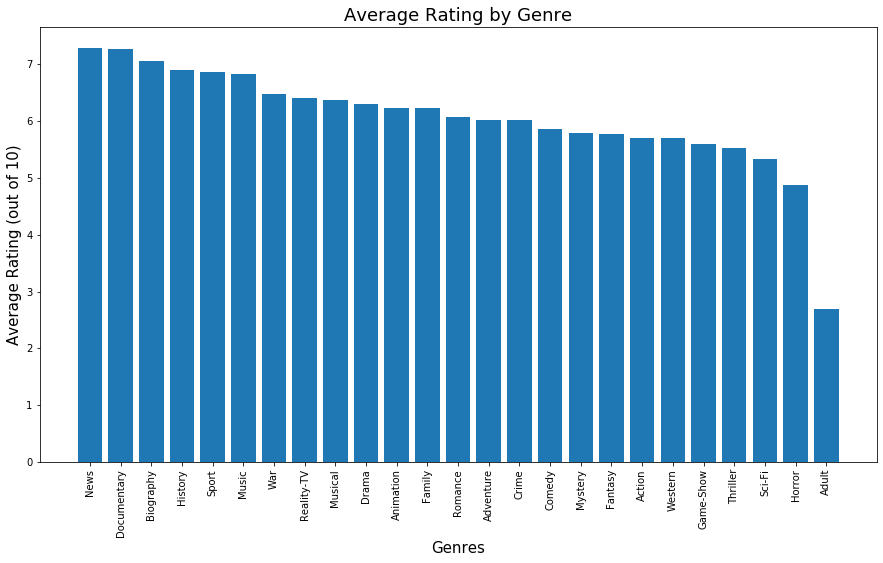

In [124]:
plt.figure(figsize=(15,8))
# bar plot with matplotlib
plt.bar('genres', 'avg_rating',data=sorted_genre_rating_df)
plt.xlabel("Genres", size=15)
plt.xticks(rotation=90)
plt.ylabel("Average Rating (out of 10)", size=15)
plt.title("Average Rating by Genre", size=18)

In [95]:
genre_rating.sort(reverse=True)

In [110]:
genre_rating_df = pd.DataFrame({"genres":list_of_genres,
                  "avg_rating":genre_rating})

Dictionary, where key = specific genre and value = mean rating

I also want to make a bar graph of mean genre ratings, where x = genre and y = mean rating

In [ ]:
plt.bar(x='list_of_genres', y='genre_rating', figsize=(10,8))

Now I want to create a dictionary where the key is a specific genre and the value is the mean rating of that genre

In [125]:
list_of_genres

['Family',
 'History',
 'Sci-Fi',
 'Horror',
 'Animation',
 'Sport',
 'Game-Show',
 'Documentary',
 'News',
 'Reality-TV',
 'Western',
 'Action',
 'Drama',
 'Adventure',
 'Musical',
 'Biography',
 'Music',
 'Mystery',
 'Fantasy',
 'Adult',
 'War',
 'Crime',
 'Comedy',
 'Thriller',
 'Romance']

In [ ]:
def myfunction(list_a, list_b):
   return dict(zip(list_a, list_b))

my_dict = myfunction(some_list_a, some_list_b)

In [ ]:
joined_df.info()

In [126]:
def med_gross(genre):
    """
    Finds the median rating for a genre.
    Input: Genre as a string.
    Output: List of (domestic gross, foreign gross) as integers.
    """
    genre_dom_gross = []
    for x in dom_gross_df.index:
        if genre in dom_gross_df['genres'][x]:
            genre_dom_gross.append(dom_gross_df['domestic_gross'][x])
    return(np.median(genre_dom_gross))

In [132]:
med_gross('Game-Show')

/Users/jerpagirsky/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/jerpagirsky/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

In [146]:
dom_gross_df['genres']

title                     year
10 Cloverfield Lane       2016          Drama,Horror,Mystery
102 Not Out               2018                  Comedy,Drama
11-11-11                  2011       Horror,Mystery,Thriller
12 Strong                 2018          Action,Drama,History
12 Years a Slave          2013       Biography,Drama,History
                                             ...            
Zero Motivation           2014                  Comedy,Drama
Zindagi Na Milegi Dobara  2011                  Comedy,Drama
Zookeeper                 2011         Comedy,Family,Romance
Zoolander 2               2016                        Comedy
Zootopia                  2016    Adventure,Animation,Comedy
Name: genres, Length: 1832, dtype: object

In [131]:
dom_gross_df.isna().sum()

original_title       0
runtime_minutes      0
genres               0
genre_1              0
genre_2            230
genre_3            727
averagerating        0
numvotes             0
studio               0
domestic_gross       0
foreign_gross      577
dtype: int64

In [168]:
genre_med_gross = []
for genre in list_of_genres:
    genre_med_gross.append(med_gross(genre))

/Users/jerpagirsky/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/jerpagirsky/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [148]:
genre_med_gross

[43900000.0,
 4000000.0,
 79200000.0,
 21100000.0,
 85150000.0,
 13700000.0,
 nan,
 517000.0,
 13200.0,
 nan,
 5700000.0,
 26150000.0,
 4100000.0,
 64900000.0,
 2800000.0,
 6750000.0,
 3700000.0,
 15900000.0,
 31200000.0,
 nan,
 947500.0,
 11300000.0,
 17800000.0,
 15900000.0,
 3000000.0]

In [150]:
med_dom_gross_df = pd.DataFrame({"genres":list_of_genres,
                  "median_domestic_gross":genre_med_gross})

In [195]:
med_dom_gross_df.sort_values(by='median_domestic_gross',ascending=False)

,genres,median_domestic_gross
4,Animation,85150000.0
2,Sci-Fi,79200000.0
13,Adventure,64900000.0
0,Family,43900000.0
18,Fantasy,31200000.0
11,Action,26150000.0
3,Horror,21100000.0
22,Comedy,17800000.0
23,Thriller,15900000.0
17,Mystery,15900000.0


In [154]:
sorted_med_dom_gross_df = med_dom_gross_df.sort_values(by='median_domestic_gross', ascending=False)

In [171]:
sorted_med_dom_gross_df = sorted_med_dom_gross_df.dropna()

In [173]:
sorted_med_dom_gross_df

,genres,median_domestic_gross
4,Animation,85150000.0
2,Sci-Fi,79200000.0
13,Adventure,64900000.0
0,Family,43900000.0
18,Fantasy,31200000.0
11,Action,26150000.0
3,Horror,21100000.0
22,Comedy,17800000.0
23,Thriller,15900000.0
17,Mystery,15900000.0


Text(0.5, 1.0, 'Median Domestic Gross by Genre')

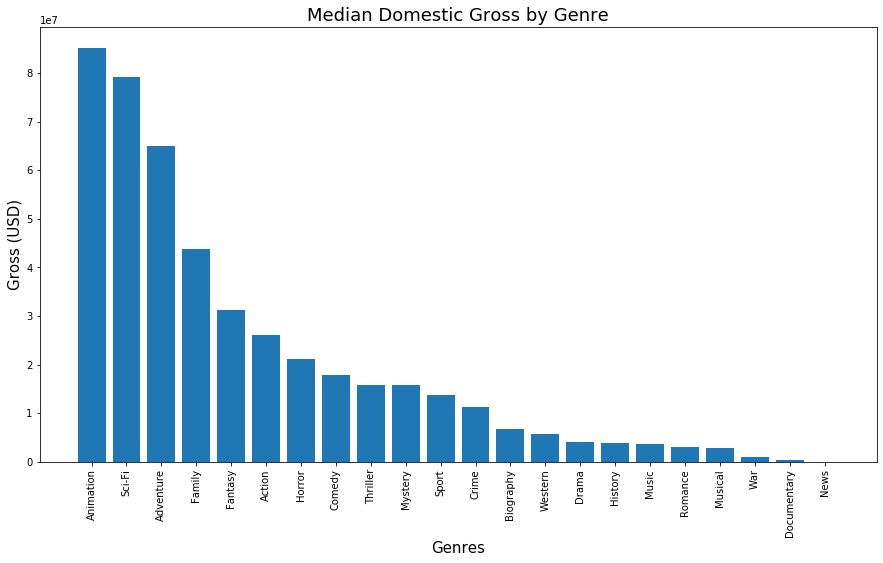

In [186]:
plt.figure(figsize=(15,8))
# bar plot with matplotlib
plt.bar('genres', 'median_domestic_gross',data=sorted_med_dom_gross_df)
plt.xlabel("Genres", size=15)
plt.xticks(rotation=90)
plt.ylabel("Gross (USD)", size=15)
plt.title("Median Domestic Gross by Genre", size=18)

In [198]:
avg_rate_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 51478 entries, (63 Boycott, 2017) to (Inception, 2010)
Data columns (total 11 columns):
original_title     51478 non-null object
runtime_minutes    47857 non-null float64
genres             51478 non-null object
genre_1            51478 non-null object
genre_2            27945 non-null object
genre_3            14130 non-null object
averagerating      51478 non-null float64
numvotes           51478 non-null float64
studio             1706 non-null object
domestic_gross     1700 non-null float64
foreign_gross      1175 non-null object
dtypes: float64(4), object(7)
memory usage: 13.1+ MB


In [200]:
runtime_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 104096 entries, (Uniform, 2015) to (Against All Odds, the Making of DEUCE of SPADES, 2016)
Data columns (total 11 columns):
original_title     104096 non-null object
runtime_minutes    104096 non-null float64
genres             104096 non-null object
genre_1            104096 non-null object
genre_2            49880 non-null object
genre_3            25366 non-null object
averagerating      62117 non-null float64
numvotes           62117 non-null float64
studio             1708 non-null object
domestic_gross     1702 non-null float64
foreign_gross      1177 non-null object
dtypes: float64(4), object(7)
memory usage: 10.3+ MB


In [201]:
joined_df.

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 133023 entries, (!Women Art Revolution, 2010) to (Šiška Deluxe, 2015)
Data columns (total 11 columns):
original_title     133022 non-null object
runtime_minutes    106282 non-null float64
genres             133023 non-null object
genre_1            133023 non-null object
genre_2            55951 non-null object
genre_3            27730 non-null object
averagerating      69281 non-null float64
numvotes           69281 non-null float64
studio             1708 non-null object
domestic_gross     1702 non-null float64
foreign_gross      1177 non-null object
dtypes: float64(4), object(7)
memory usage: 17.8+ MB


In [206]:
avg_rate_list = joined_df['averagerating'].dropna()

In [207]:
avg_rate_list

title                                                                               year
!Women Art Revolution                                                               2010    6.9
#1 Serial Killer                                                                    2013    5.6
#5                                                                                  2013    6.8
#66                                                                                 2015    5.3
#ALLMYMOVIES                                                                        2015    8.3
                                                                                           ... 
Üç Harflilerin Musallat Oldugu Büyülü Konakta Ruh Çagiran Gençlerin Hazin Hikayesi  2018    4.8
Üç, Iki, Bir... Kestik!                                                             2014    4.3
à propos: philosophie                                                               2016    8.2
ärtico                                         

In [208]:
numvotes_list = joined_df['numvotes'].dropna()

In [209]:
numvotes_list

title                                                                               year
!Women Art Revolution                                                               2010    196.0
#1 Serial Killer                                                                    2013     40.0
#5                                                                                  2013      6.0
#66                                                                                 2015     18.0
#ALLMYMOVIES                                                                        2015     21.0
                                                                                            ...  
Üç Harflilerin Musallat Oldugu Büyülü Konakta Ruh Çagiran Gençlerin Hazin Hikayesi  2018     51.0
Üç, Iki, Bir... Kestik!                                                             2014     88.0
à propos: philosophie                                                               2016      5.0
ärtico                       

In [211]:
rate_pop_df = pd.DataFrame({"avg_rating":avg_rate_list,
                  "numvotes":numvotes_list})

In [212]:
rate_pop_df

,,avg_rating,numvotes
title,year,,
!Women Art Revolution,2010,6.9,196.0
#1 Serial Killer,2013,5.6,40.0
#5,2013,6.8,6.0
#66,2015,5.3,18.0
#ALLMYMOVIES,2015,8.3,21.0
...,...,...,...
Üç Harflilerin Musallat Oldugu Büyülü Konakta Ruh Çagiran Gençlerin Hazin Hikayesi,2018,4.8,51.0
"Üç, Iki, Bir... Kestik!",2014,4.3,88.0
à propos: philosophie,2016,8.2,5.0


In [ ]:
def avg_genre_rating(genre):
    """
    Finds the average rating for a genre.
    Input: Genre as a string.
    Output: Average rating for genre as a float.
    """
    genre_rating = []
    for x in avg_rate_df.index:
        if genre in avg_rate_df['genres'][x]:
            genre_rating.append(avg_rate_df['averagerating'][x])
    return(np.mean(genre_rating)).round(2)

In [228]:
def genre_pop(genre):
    """
    Finds the median number of votes for a genre.
    Input: Genre as a string.
    Output: Number of votes as a float.
    """
    genre_popularity = []
    for x in avg_rate_df.index:
        if genre in avg_rate_df['genres'][x]:
            genre_popularity.append(avg_rate_df['numvotes'][x])
    return(np.median(genre_popularity))

In [232]:
pop_genre = []
for genre in list_of_genres:
    pop_genre.append(genre_pop(genre))

/Users/jerpagirsky/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tornado/gen.py:209: PerformanceWarning:

indexing past lexsort depth may impact performance.



In [233]:
list_of_genres

['Family',
 'History',
 'Sci-Fi',
 'Horror',
 'Animation',
 'Sport',
 'Game-Show',
 'Documentary',
 'News',
 'Reality-TV',
 'Western',
 'Action',
 'Drama',
 'Adventure',
 'Musical',
 'Biography',
 'Music',
 'Mystery',
 'Fantasy',
 'Adult',
 'War',
 'Crime',
 'Comedy',
 'Thriller',
 'Romance']

In [234]:
pop_genre

[96.0,
 108.0,
 224.0,
 133.0,
 180.0,
 141.0,
 3462.0,
 51.0,
 55.0,
 29.5,
 118.0,
 321.0,
 141.0,
 232.0,
 97.0,
 123.0,
 96.0,
 214.0,
 190.0,
 78.0,
 195.0,
 291.0,
 167.0,
 219.0,
 201.0]

In [236]:
med_dom_gross_df['median_numvotes'] = pop_genre

In [245]:
med_dom_gross_df['mean_rating'] = genre_rating

In [274]:
new_joined_df = med_dom_gross_df

In [268]:
new_joined_df = new_joined_df.sort_values(by='median_domestic_gross', ascending=False)

In [275]:
new_joined_df

,genres,median_domestic_gross,median_numvotes,mean_rating
0,Family,43900000.0,96.0,6.23
1,History,4000000.0,108.0,6.90
2,Sci-Fi,79200000.0,224.0,5.33
3,Horror,21100000.0,133.0,4.87
4,Animation,85150000.0,180.0,6.24
5,Sport,13700000.0,141.0,6.87
7,Documentary,517000.0,51.0,7.27
8,News,13200.0,55.0,7.29
10,Western,5700000.0,118.0,5.71
11,Action,26150000.0,321.0,5.71


In [272]:
new_joined_df = new_joined_df.sort_values(by='median_numvotes', ascending=False)

In [60]:
data= sorted_med_dom_gross_df

fig = go.Figure(data=go.Scatter(x=data['genres'],
                                y=data['median_domestic_gross'],
                                mode='markers',
                                marker_color=data['median_domestic_gross'],
                                text=data['genres'])) # hover text goes here

fig.update_layout(title='Median Domestic Gross by Genre')
fig.show()

NameError: name 'sorted_med_dom_gross_df' is not defined

In [290]:
plt.style.use('ggplot')

In [336]:
new_joined_df.head()

,genres,median_domestic_gross,median_numvotes,mean_rating
0,Family,43900000.0,96.0,6.23
1,History,4000000.0,108.0,6.90
2,Sci-Fi,79200000.0,224.0,5.33
3,Horror,21100000.0,133.0,4.87
4,Animation,85150000.0,180.0,6.24


In [358]:
vote_sort_df = new_joined_df.sort_values(by='median_numvotes', ascending=False)

In [ ]:
new_joined_df.plot.scatter('mean_rating', 'C', 
                  c = 'B',
                  s = data['B'],
                  colormap = 'viridis');

Text(0.5, 1.0, 'Median Domestic Gross by Genre')

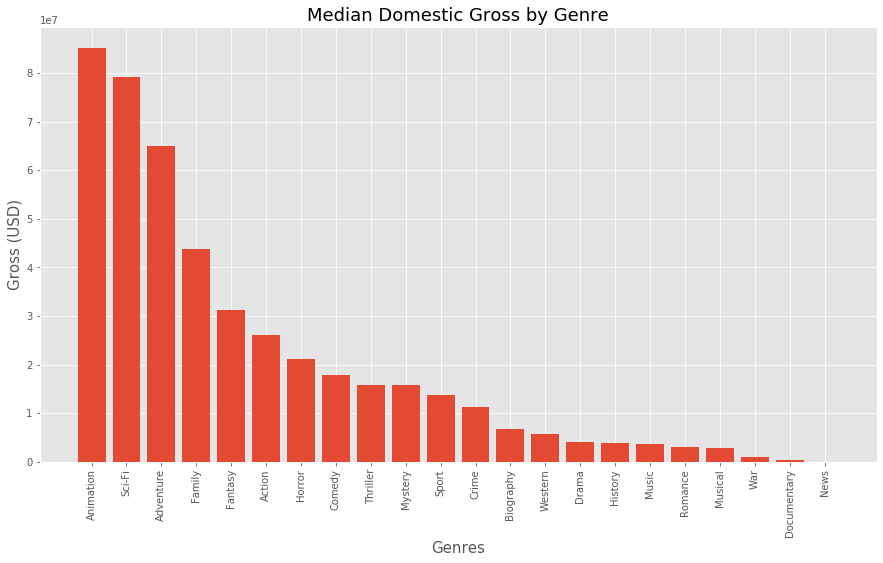

In [339]:
plt.figure(figsize=(15,8))
# bar plot with matplotlib
plt.bar('genres', 'median_domestic_gross',data=sorted_med_dom_gross_df)
plt.xlabel("Genres", size=15)
plt.xticks(rotation=90)
plt.ylabel("Gross (USD)", size=15)
plt.title("Median Domestic Gross by Genre", size=18)

Text(0.5, 1.0, 'Average Rating by Genre')

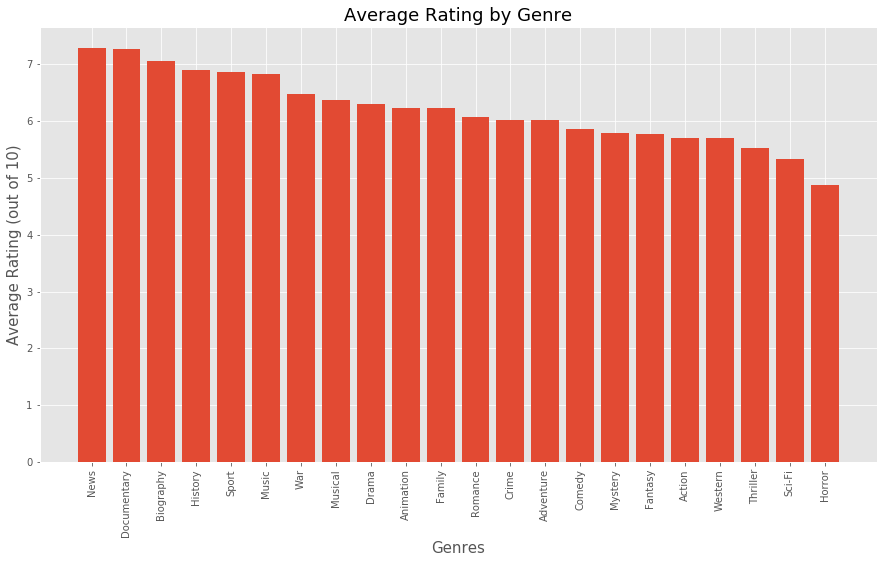

In [347]:
plt.figure(figsize=(15,8))
# bar plot with matplotlib
plt.bar('genres', 'mean_rating',data=rate_sort_df)
plt.xlabel("Genres", size=15)
plt.xticks(rotation=90)
plt.ylabel("Average Rating (out of 10)", size=15)
plt.title("Average Rating by Genre", size=18)

Text(0.5, 1.0, 'Median Number of Votes per Movie by Genre')

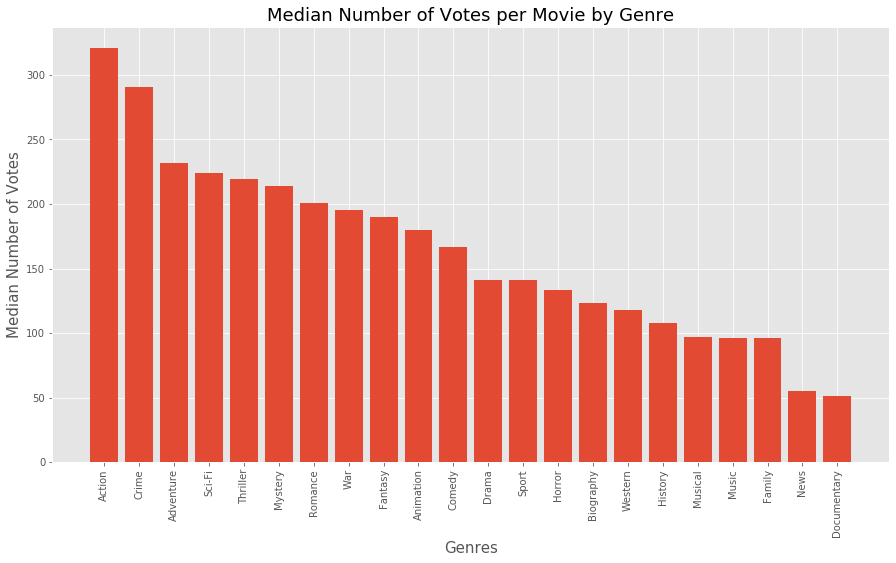

In [361]:
plt.figure(figsize=(15,8))
# bar plot with matplotlib
plt.bar('genres', 'median_numvotes',data=vote_sort_df)
plt.xlabel("Genres", size=15)
plt.xticks(rotation=90)
plt.ylabel("Median Number of Votes", size=15)
plt.title("Median Number of Votes per Movie by Genre", size=18)

In [1]:
df = new_joined_df
fig = px.scatter(df, x="mean_rating", y="median_domestic_gross", text='genres', log_x=True, color="median_numvotes",
                 labels={
                     "genres": "Genre",
                     "mean_rating": "Mean Rating (out of 10)",
                     "median_numvotes": "Median Number of Votes per Movie",
                     "median_domestic_gross": "Domestic Gross (USD)"
                 },
                title="Popularity and Mean Rating by Genre")
fig.update_layout(
    margin=dict(l=30, r=30, t=30, b=30),
    paper_bgcolor="LightSteelBlue"),
fig.show()

NameError: name 'new_joined_df' is not defined